# Exploratory Data Analysis

This Jupyter Notebook presents an analysis of data related to the Los Angeles wildfires, collected from Reddit comments. We examined shifts in public discourse during the climate crisis, tracked patterns and peaks in activity, and tested our own hypotheses about the impact of the fires on changes in public sentiment.

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import glob
import os

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
csv_file = '/content/drive/YOUR PATH TO/cleaned_all_data.csv'
df = pd.read_csv(csv_file, parse_dates=['datetime'])

In [4]:
df.head()

,comment_id,datetime,author,score,body,subreddit,link_id,permalink,government_mentioned,fire_mentioned,lafd_related,urban_planning_related,fabricated_fires_related,celebrity_related,ai_related,disinformation_related,antisemitic_related,weather_related,conspiracy_mentioned,humanitarian_aid_mentioned
0,lzsk65x,2024-12-01 00:00:00,Ikeelu,-11,"Not exactly, but it's not new either. Batterie...",news,t3_1h3p9ja,https://www.reddit.com/r/news/comments/1h3p9ja...,False,False,False,False,False,False,True,False,False,False,False,False
1,lzsk7i1,2024-12-01 00:00:13,blackace352,2,The first slave owner in America was Anthony J...,conspiracy,t3_1h3m1qb,https://www.reddit.com/r/conspiracy/comments/1...,False,False,False,False,False,False,False,False,False,False,False,False
2,lzsk7jb,2024-12-01 00:00:13,Jeff_Baezos,7,Was it the furniture store by Santa Ana Colleg...,orangecounty,t3_1h3j3fx,https://www.reddit.com/r/orangecounty/comments...,False,False,False,False,False,False,False,False,False,True,False,False
3,lzsk7v2,2024-12-01 00:00:16,cabs2kinkos,3,Burritos are not Mexican food. The burritos yo...,AskLosAngeles,t3_1h3jr6l,https://www.reddit.com/r/AskLosAngeles/comment...,False,False,False,False,False,False,False,False,False,False,False,False
4,lzsk7zp,2024-12-01 00:00:17,Fallom_,766,RIP. You'd have to be a fucking moron to let y...,news,t3_1h3p9ja,https://www.reddit.com/r/news/comments/1h3p9ja...,False,False,False,False,False,False,False,False,False,False,False,False


### **1. Overview:** dataset shape, number of records, timeframe, basic info

The dataset's shape: rows and columns

In [5]:
rows, columns = df.shape
print(f"Dataset has {rows} rows and {columns} columns")

Dataset has 3587384 rows and 20 columns


**1.1 What is the total number of records comments in the dataset?:**

In [6]:
total_comments = df.index.size
print(f"Total number of comments: {len(df)}")

Total number of comments: 3587384



**1.2  What is the timeframe covered by the dataset?**

In [7]:
start_date = df['datetime'].min()
end_date = df['datetime'].max()
print("Timeframe:", start_date, "to", end_date)

Timeframe: 2024-12-01 00:00:00 to 2025-03-31 00:00:00


**1.3  What is the total number of unique subreddits present in the dataset?**


In [8]:
total_unique_subreddits = df['subreddit'].nunique()
print("Number of subreddits:", total_unique_subreddits)

Number of subreddits: 9


**1.4 What is the total number of unique authors contributing to the dataset?**


In [9]:
unique_authors = df['author'].nunique()
print("Number of unique authors:", unique_authors)

Number of unique authors: 536256


**1.5 What is the number of categories we are analyzing?** (Fire_mentioned, Water_theories_related, Urban_planning_related, Fabricated_fires_theories_related, Celebrity_related…)


In [10]:
categories = [
    'government_mentioned', 'fire_mentioned', 'urban_planning_related',
    'fabricated_fires_related', 'celebrity_related', 'ai_related',
    'disinformation_related', 'antisemitic_related', 'weather_related',
    'conspiracy_mentioned', 'humanitarian_aid_mentioned'
]
num_categories = len(categories)
print("Number of categories being analyzed:", num_categories)


Number of categories being analyzed: 11


## Main questions we want to explore:
#### - What was the primary focus of public discussions related to the fire? We hypothesize that once the peak days of the fire incidents had passed, the discourse may have shifted toward topics such as humanitarian aid, theories about fire fabrication, and criticism of government actions.
#### - How did public attitudes toward the government evolve over the selected period? We aim to examine whether the emergence of various conspiracy theories and claims of fire fabrication contributed to increased criticism of governmental actions.



### **2. Activity and distribution**

In [13]:
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates


MY_PALETTE = {
    'main_yellow':   '#ffa600',
    'accent_coral':  '#ff6361',
    'mid_pink':      '#bc5090',
    'mid_purple':    '#58508d',
    'dark_blue':     '#003f5c'
}

MY_COLOR_LIST = [
    '#ffa600',
    '#ff6361',
    '#bc5090',
    '#58508d',
    '#003f5c'
]

sns.set_palette(sns.color_palette(MY_COLOR_LIST))

**2.1 What subreddits were the most active over the period of time we analyse?**


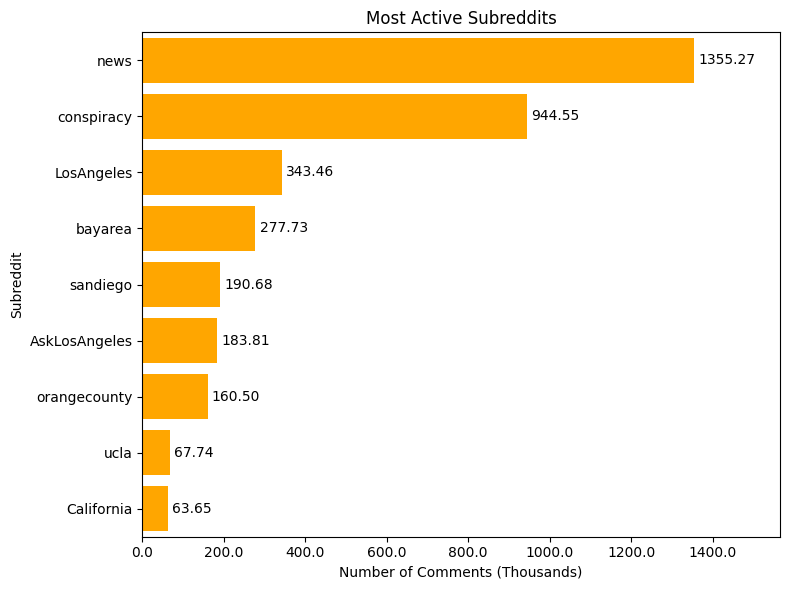

In [14]:
import matplotlib.ticker as ticker #for axes formatting

subreddit_activity = df['subreddit'].value_counts()
top_subreddits = subreddit_activity.head(10)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=top_subreddits.values,
    y=top_subreddits.index,
    orient='h',
    color='#ffa600',
    saturation=1
)

plt.title('Most Active Subreddits')
plt.xlabel('Number of Comments (Thousands)')
plt.ylabel('Subreddit')


#axes formatting
def millions_formatter(x, pos):
    return f'{x / 1_000:.1f}'

ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
custom_labels = [f'{value / 1_000:.2f}' for value in top_subreddits.values]

ax.bar_label(ax.containers[0], labels=custom_labels, padding=3, fontsize=10)

#plot size formatting
xlim = ax.get_xlim()
ax.set_xlim(xlim[0], xlim[1] * 1.1)


plt.tight_layout()
plt.show()

The highest activity levels were observed in the subreddits news, conspiracy, and Los Angeles. These subreddits have the largest audiences and contain the most extensive data volumes.

**2.2 The ratio between the number of comments and unique authors. What is the average number of comments per author?**

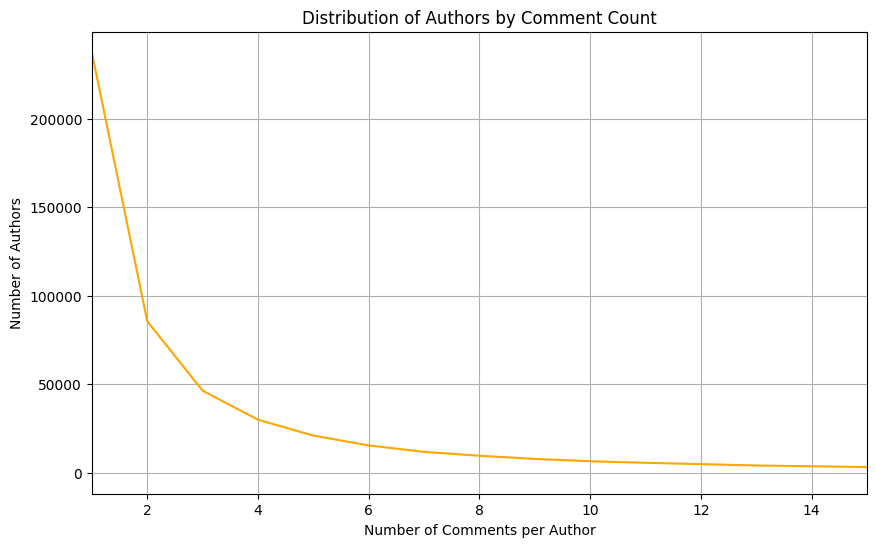

In [17]:
comment_counts = df['author'].value_counts()
distribution = comment_counts.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.xlim(1, 15)
plt.plot(distribution.index, distribution.values,
         color='#ffa600')
plt.xlabel('Number of Comments per Author')
plt.ylabel('Number of Authors')
plt.title('Distribution of Authors by Comment Count')

plt.grid(True)
plt.show()

This visualization shows the distribution of comments per author. We can see that mostly one person left one comment.

**2.3 How is comment activity distributed over 4 months (December-March)?**

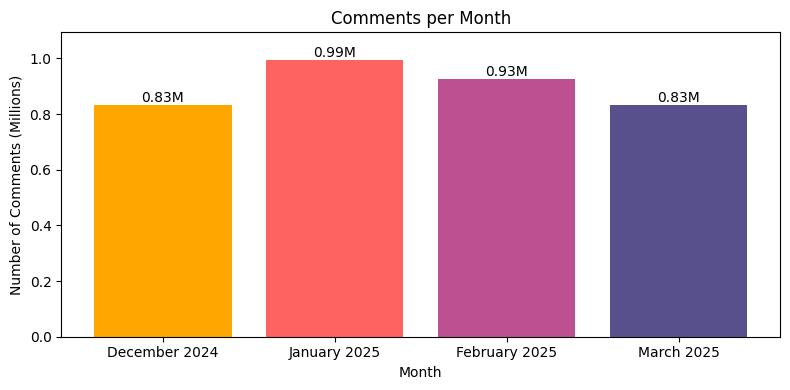

In [18]:
df['month'] = df['datetime'].dt.to_period('M')
monthly_counts = df['month'].value_counts().sort_index()

month_labels = [f"{calendar.month_name[m.month]} {m.year}" for m in monthly_counts.index]

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(month_labels, monthly_counts.values, color=MY_COLOR_LIST[:4])

plt.xlabel('Month')
plt.ylabel('Number of Comments (Millions)')
plt.title('Comments per Month')

# axes formatting
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.1f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

#labels
for i, value in enumerate(monthly_counts.values):
    label = f'{value / 1_000_000:.2f}M'
    ax.text(i, value, label, ha='center', va='bottom', fontsize=10)

ax.set_ylim(top=monthly_counts.values.max() * 1.1)

plt.tight_layout()
plt.show()

The highest volume of discussion in the selected subreddits occurred in January, which corresponds to the target period. This concentration may reflect the predominance of local subreddits in the sample, which were likely to exhibit heightened responsiveness to contemporaneous events.

**2.4 Location distribution**

In [19]:
!pip install geopandas #import map

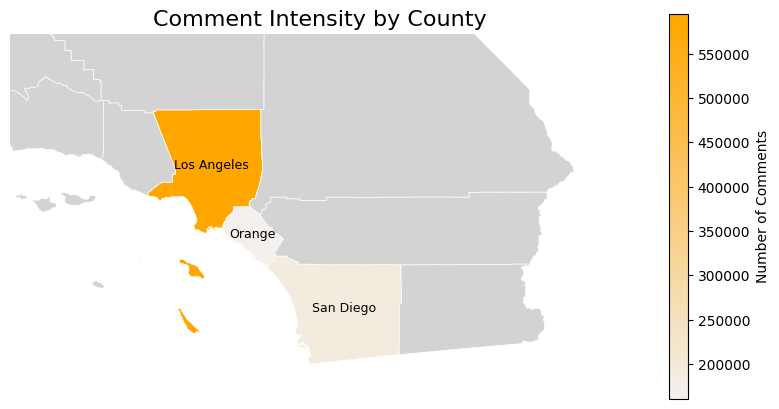

In [20]:
import geopandas as gpd

geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson"
gdf = gpd.read_file(geojson_url)

NAME_COLUMN = 'name'

subreddit_to_county_map = {
    'LosAngeles': 'Los Angeles',
    'AskLosAngeles': 'Los Angeles',
    'ucla': 'Los Angeles',
    'orangecounty': 'Orange',
    'sandiego': 'San Diego',
}

df['county_name'] = df['subreddit'].map(subreddit_to_county_map)

county_counts = df.groupby('county_name').size().reset_index(name='comment_count')

gdf_merged = gdf.merge(
    county_counts,
    left_on=NAME_COLUMN,
    right_on='county_name',
    how='left'
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

cmap_sequential = sns.light_palette(color=MY_PALETTE['main_yellow'], as_cmap=True)

gdf_merged.plot(
    ax=ax,
    column='comment_count',
    cmap=cmap_sequential,
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey'},
    legend=True,
    legend_kwds={'label': "Number of Comments", 'shrink': 0.5}
)

gdf_to_label = gdf_merged.dropna(subset=['comment_count'])

for idx, row in gdf_to_label.iterrows():
    ax.annotate(
        text=row[NAME_COLUMN],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        va='center',
        fontsize=9,
        color='black',
    )

plt.title('Comment Intensity by County', fontsize=16)

ax.set_ylim(32.4, 35.5)
ax.set_xlim(-120.5, -113.5)
ax.axis('off')

plt.show()

We included local subreddits in our analysis, based on the assumption that fire-related discussions would be most active within them. Local online communities tend to respond to crisis events more rapidly and emotionally, making them a key source for examining initial reactions and the formation of narratives.

### **3. Content analysis**

**3.1 What is the ratio between the most dominant keyword category (by count) and the least dominant keyword category (by count)?**

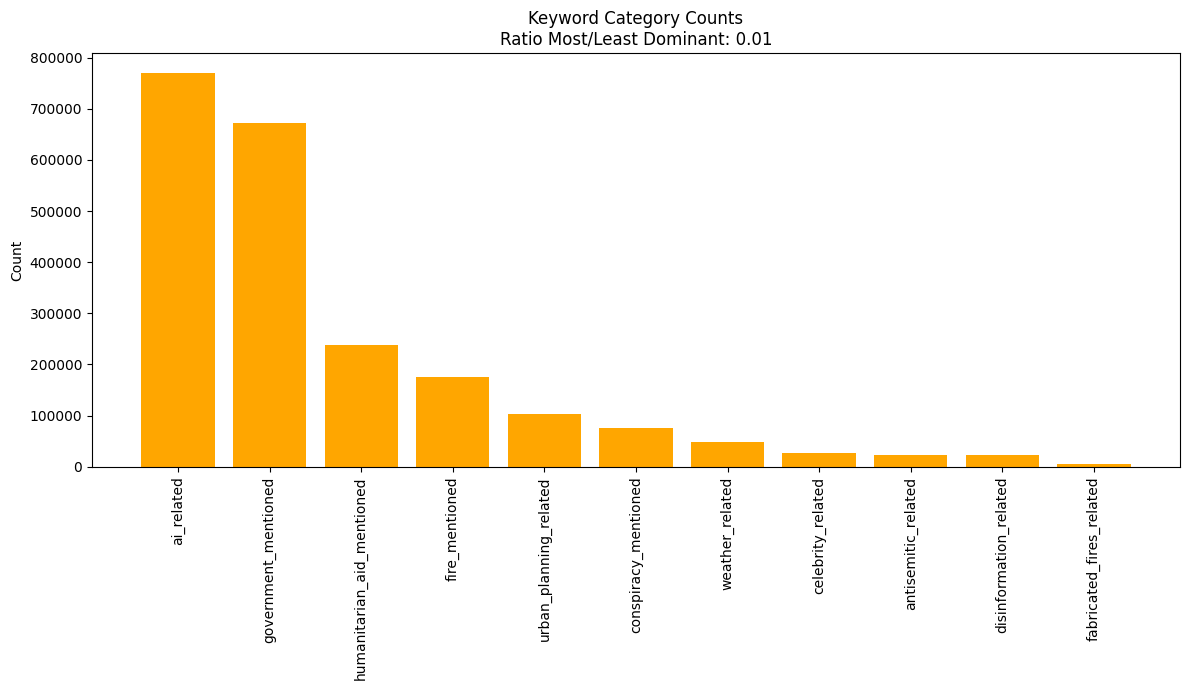

In [24]:
category_counts = df[categories].sum().sort_values(ascending=False)

most_dominant = category_counts.iloc[-1]
least_dominant = category_counts.iloc[0]
ratio = most_dominant / least_dominant if least_dominant != 0 else None


plt.figure(figsize=(12, 7))
bars = plt.bar(category_counts.index, category_counts.values, color=MY_PALETTE['main_yellow'], )
plt.xticks(rotation=90)

plt.title(f'Keyword Category Counts\nRatio Most/Least Dominant: {ratio:.2f}')
plt.ylabel('Count')

bars[-1].set_linewidth(2)
bars[0].set_linewidth(2)

plt.tight_layout()
plt.show()

During the data parsing stage, monthly subreddit content was categorized based on keyword analysis, with categories selected for their anticipated relevance to the research objectives. The most frequently discussed topics included artificial intelligence, government, and humanitarian aid, followed by references to fire. Subsequent analysis will examine whether this distribution shifts over the selected time period.

 **3.2 What is the number of comments on each category during the every month?**

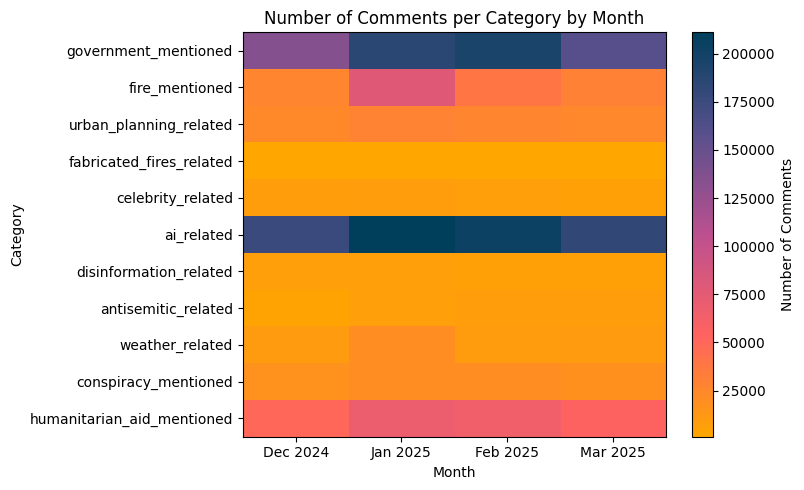

In [25]:
df['month_dt'] = df['month'].dt.to_timestamp('M')

df = df.set_index('month_dt')

categories = ['government_mentioned', 'fire_mentioned', 'urban_planning_related',
    'fabricated_fires_related', 'celebrity_related', 'ai_related',
    'disinformation_related', 'antisemitic_related', 'weather_related',
    'conspiracy_mentioned', 'humanitarian_aid_mentioned']
monthly_counts = df[categories].resample('ME').sum()

heatmap_data = monthly_counts.T


plt.figure(figsize=(8, 5))

from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('my_palette', MY_COLOR_LIST)
im = plt.imshow(heatmap_data, aspect='auto', cmap=my_cmap)
plt.colorbar(im, label='Number of Comments')

months = [d.strftime('%b %Y') for d in heatmap_data.columns]
plt.xticks(ticks=np.arange(len(months)), labels=months)
plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

plt.title('Number of Comments per Category by Month')
plt.xlabel('Month')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

The heatmap illustrates the number of comments across various categories over a four-month period. January emerges as the peak month of activity in nearly all categories, aligning with the previously identified period of heightened interest within the selected subreddits. As anticipated, a notable increase is observed in references to fire, likely reflecting public reactions to fire-related incidents. It is also evident that the selected topics concerning conspiracy theories or alleged fire fabrication do not exhibit significant peaks in January. Further analysis will determine whether this is due to a general lack of popularity in these discussions, or whether the frequency of such mentions increased specifically within comment threads related to fire.

**3.3 How does mention of fires change in each subreddit in January compared to December?**

In [27]:
fires = df[df['fire_mentioned'] == True].copy()

target_months = ['2024-12', '2025-01']
fires = fires[fires['month'].astype(str).isin(target_months)]

counts = fires.groupby(['subreddit', 'month']).size().unstack()
counts = counts.sort_values(by='2025-01', ascending=False)

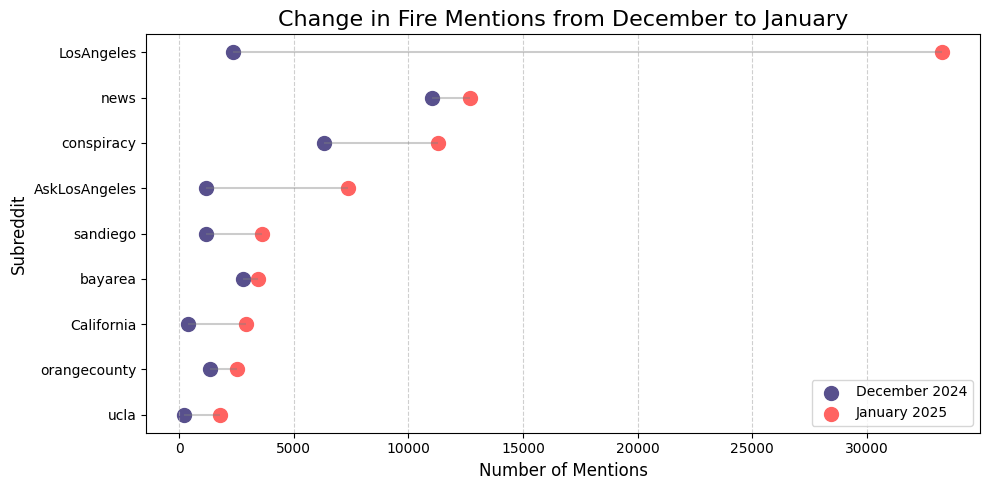

In [28]:
plt.figure(figsize=(10, 5))

plt.hlines(
    y=counts.index,
    xmin=counts['2024-12'],
    xmax=counts['2025-01'],
    color='grey',
    alpha=0.4
)

#december
plt.scatter(
    counts['2024-12'],
    counts.index,
    color=MY_PALETTE['mid_purple'],
    s=100,
    label='December 2024'
)

#january
plt.scatter(
    counts['2025-01'],
    counts.index,
    color=MY_PALETTE['accent_coral'],
    s=100,
    label='January 2025'
)

plt.legend()
plt.title('Change in Fire Mentions from December to January', fontsize=16)
plt.xlabel('Number of Mentions', fontsize=12)
plt.ylabel('Subreddit', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

The number of fire-related mentions increased substantially in January compared to December across all analyzed subreddits. The most pronounced growth is as expected observed in local subreddits such as LosAngeles and AskLosAngeles.

A notable increase in fire-related mentions is also observed in the conspiracy subreddit. It is assumed that the progression of events during the fire incidents may have triggered conspiratorial interpretations—ranging from allegations of deliberate arson to speculations about concealed causes. Discussions of fire may have intersected with broader themes such as climate change, governmental actions, and control technologies, which frequently appear in conspiracy-oriented discourse.

**3.4 How does the mention of fires change in January?**

In [29]:
!pip install squarify

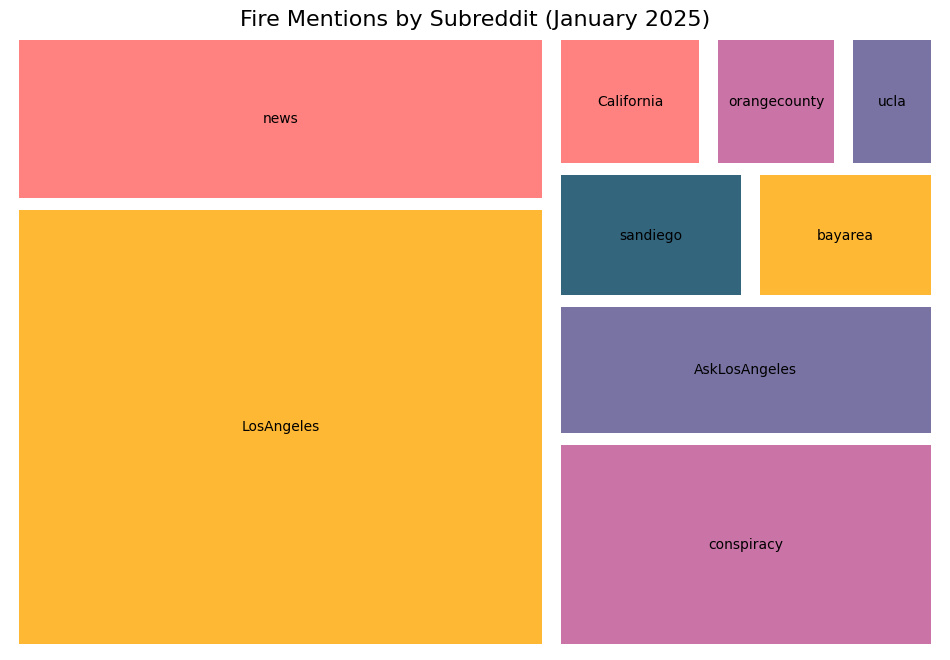

In [30]:
import squarify
import itertools
fires = df[df['fire_mentioned'] == True].copy()
fires_january = fires[fires['month'] == '2025-01']
counts = fires_january['subreddit'].value_counts()

num_subreddits = df['subreddit'].nunique()
palette_cycled = list(itertools.islice(itertools.cycle(MY_COLOR_LIST), num_subreddits))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=counts.values,
    label=counts.index,
    alpha=0.8,
    pad=True,
    color=palette_cycled
)
plt.title('Fire Mentions by Subreddit (January 2025)', fontsize=16)
plt.axis('off')
plt.show()

This treemap visualizes the distribution of fire-related mentions across subreddits during January 2025. Each segment reflects the relative volume of comments, highlighting which communities were most actively engaged in discussions involving fire.

**3.5 How did the mention of fires change in January?**

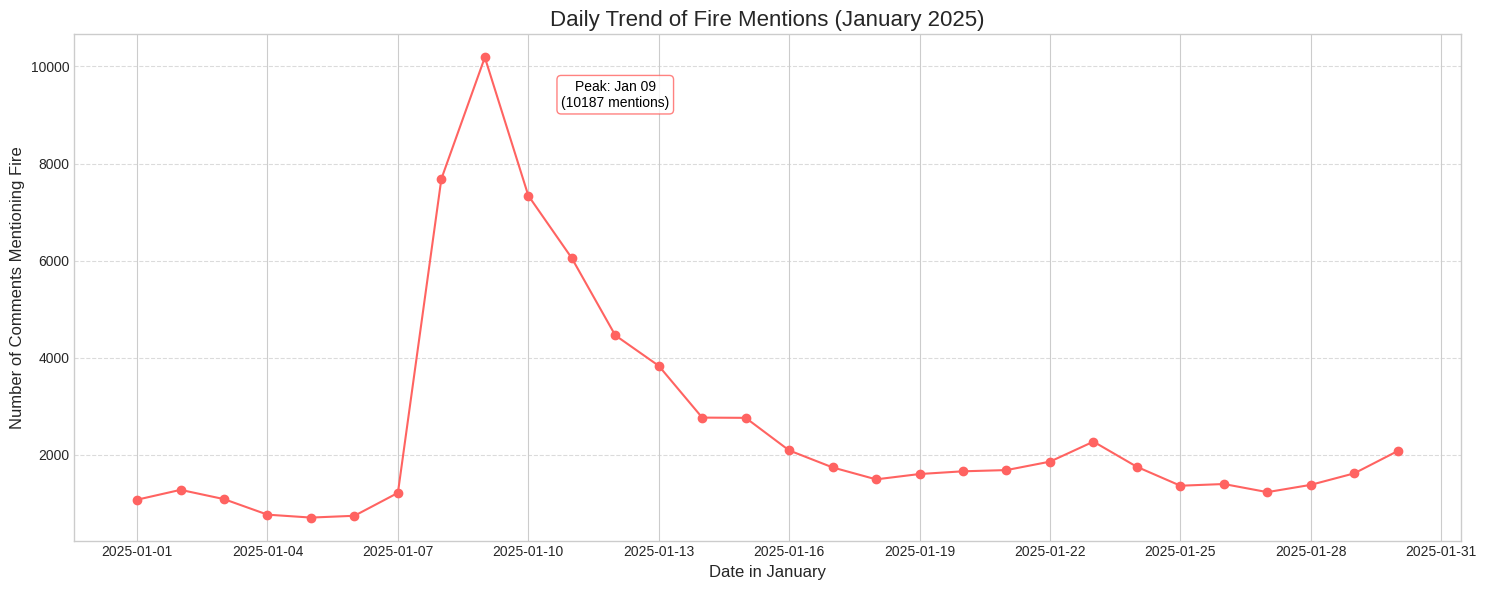

In [33]:
import matplotlib.dates as mdates

df_january = df[
    (df['datetime'] >= '2025-01-01') & (df['datetime'] <= '2025-01-31')].copy()

df_january.set_index('datetime', inplace=True)
daily_fire_counts = df_january.resample('D')['fire_mentioned'].sum()


plt.figure(figsize=(15, 6))
plt.plot(
    daily_fire_counts.index,
    daily_fire_counts.values,
    color=MY_PALETTE['accent_coral'],
    marker='o',
    linestyle='-'
)

peak_value = daily_fire_counts.max()
peak_date = daily_fire_counts.idxmax()

annotation_text = f"Peak: {peak_date.strftime('%b %d')}\n({peak_value} mentions)"

#peak value label
plt.annotate(
    text=annotation_text,
    xy=(peak_date + pd.Timedelta(days=3), peak_value * 0.9),
    ha='center',
    fontsize=10,
    color='black',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=MY_PALETTE['accent_coral'], lw=1, alpha=0.8),
)

plt.title('Daily Trend of Fire Mentions (January 2025)', fontsize=16)
plt.xlabel('Date in January', fontsize=12)
plt.ylabel('Number of Comments Mentioning Fire', fontsize=12)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This visualization clearly highlights a spike in fire-related mentions, which appears to have triggered further fluctuations in the daily trend. The peak on January 9, 2025, likely corresponds to the onset of fire incidents in Los Angeles. The subsequent gradual decline reflects the daily volume of comments mentioning fire throughout the remainder of the month.

**3.6 Mentioning of fires vs fires+ai throughtout four month of research.**

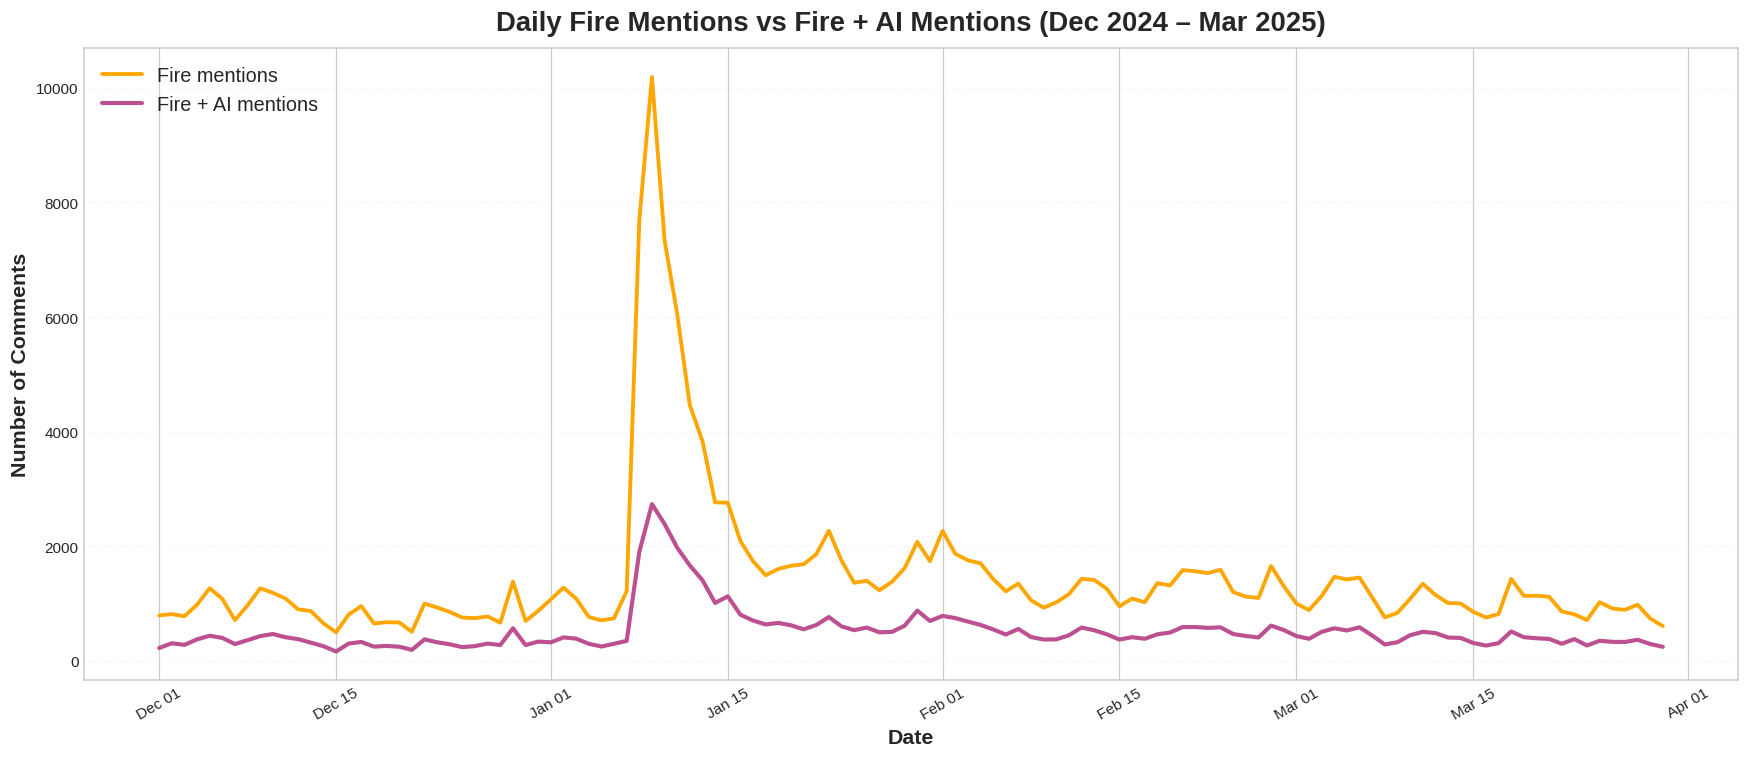

In [35]:
fire_mentions = df[df['fire_mentioned'] == True]
fire_ai_mentions = df[(df['fire_mentioned'] == True) & (df['ai_related'] == True)]

fire_mentions_count = fire_mentions.groupby('date').size().rename('Fire mentions')
fire_ai_mentions_count = fire_ai_mentions.groupby('date').size().rename('Fire + AI mentions')

result_daily = pd.concat([fire_mentions_count, fire_ai_mentions_count], axis=1).fillna(0).astype(int)
result_daily = result_daily.sort_index()

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(16, 7), dpi=110)


ax.plot(result_daily.index, result_daily['Fire mentions'], color=MY_PALETTE['main_yellow'], linewidth=2.5, label='Fire mentions')
ax.plot(result_daily.index, result_daily['Fire + AI mentions'], color=MY_PALETTE['mid_pink'], linewidth=2.7, label='Fire + AI mentions')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.grid(axis='y', linestyle=':', alpha=0.25)
plt.xticks(rotation=30)

ax.set_title('Daily Fire Mentions vs Fire + AI Mentions (Dec 2024 – Mar 2025)', fontsize=18, weight='bold', pad=12)
ax.set_xlabel('Date', fontsize=14, weight='semibold')
ax.set_ylabel('Number of Comments', fontsize=14, weight='semibold')

plt.legend(loc='upper left', fontsize=13, frameon=False)
plt.tight_layout()
plt.show()

Over the four months, while fires were a dominant topic throughout, only a small proportion of those comments specifically linked fires with AI. This demonstrates that AI-related discussions tend to emerge primarily alongside large-scale or unusual fire incidents, but everyday conversation around fires remains less connected tp technology/AI narratives, but still takes place in discussions.

**3.7 To what extent did the fire reshape the agenda of online discourse in selected subreddits?**

In [37]:
color_map_for_plot = {
    'Fire Mentions':       MY_PALETTE['accent_coral'],
    'Government Mentions': MY_PALETTE['dark_blue'],
    'Humanitarian Aid':    MY_PALETTE['mid_pink'],
    'Conspiracy Mentions': MY_PALETTE['main_yellow'],
    'Other Comments':      '#cccccc'
}
df = df.reset_index()
df_plot = df.set_index('datetime')

#topic for the change detection
topics_to_plot = [
    'fire_mentioned',
    'government_mentioned',
    'humanitarian_aid_mentioned',
    'conspiracy_mentioned'
]

weekly_topic_counts = df_plot.resample('W')[topics_to_plot].sum()
weekly_other_comments = df_plot.resample('W').apply(
    lambda x: (x[topics_to_plot].sum(axis=1) == 0).sum()
)

plot_data = weekly_topic_counts.copy()
plot_data['Other_Comments'] = weekly_other_comments

plot_data_long = plot_data.reset_index().melt(
    id_vars='datetime',
    var_name='Topic',
    value_name='Comment Volume'
)


plot_data_long['Topic'] = plot_data_long['Topic'].replace({
    'fire_mentioned': 'Fire Mentions',
    'government_mentioned': 'Government Mentions',
    'humanitarian_aid_mentioned': 'Humanitarian Aid',
    'conspiracy_mentioned': 'Conspiracy Mentions',
    'Other_Comments': 'Other Comments'
})

# time seletion
plot_data_long = plot_data_long.query("datetime < '2025-03-31'")
plot_data_long = plot_data_long.query("datetime > '2024-12-01'")


fig = px.area(
    plot_data_long,
    x='datetime',
    y='Comment Volume',
    color='Topic',
    line_group='Topic',
    color_discrete_map=color_map_for_plot,
    title='Narrative Shift: Weekly Volume of Topics'
)

fig.update_layout(
    title_x=0.5,
    xaxis_title='Date (Weekly)',
    yaxis_title='Volume of Comments',
    legend_title_text='Topic'
)

fig.show()

This graph illustrates how a crisis event — the January wildfires — acted as a catalyst for a profound transformation in public conversation.

In December 2024, we observe a stable baseline: the grey area of "Other Comments" dominates, while mentions of fire, government, or aid remain marginal background noise. By mid-January 2025, a sudden surge occurs — the coral "Fire Mentions" area expands dramatically, eclipsing all other topics. This marks the peak of the crisis, where the immediate event becomes the sole focus.

The most revealing phase comes after the peak (late January to March 2025). As fire-related mentions recede, overall discourse volume does not return to December levels. Instead, three topics — Government (dark blue), Humanitarian Aid (purple), and Conspiracy (yellow) — fill the vacuum and establish a new elevated baseline. This confirms the hypothesis of a shifted agenda.

Our next step is to analyze the temporal relationship between these emerging themes: were they connected, or did one trigger another?

**3.8 What narrative shifts accompany fire-related discourse across subreddits?**

In [38]:
#select theory related columns
theory_columns = ['urban_planning_related',
    'fabricated_fires_related', 'celebrity_related', 'ai_related',
    'disinformation_related', 'antisemitic_related', 'weather_related',
    'conspiracy_mentioned']

df = df.set_index('datetime')

df['theory_related'] = (df[theory_columns].sum(axis=1) > 0).astype(int)

Created one column for all our conspiracy theories and community's assumptions

In [40]:
import plotly.graph_objects as go

source_topic = 'fire_mentioned'

target_topics = [
    'government_mentioned',
    'humanitarian_aid_mentioned',
    'theory_related'
]

df_source = df[df[source_topic] == True]
total_source_count = len(df_source)

flows = {}
for topic in target_topics:
    flow_count = len(df_source[df_source[topic] == True])
    flows[topic] = flow_count

condition_no_targets = (df_source[target_topics[0]] == False)
for i in range(1, len(target_topics)):
    condition_no_targets = condition_no_targets & (df_source[target_topics[i]] == False)

flow_only_count = len(df_source[condition_no_targets])

all_nodes = [source_topic] + target_topics + [f"{source_topic} Only"]

perc_govt = (flows['government_mentioned'] / total_source_count) * 100
perc_aid = (flows['humanitarian_aid_mentioned'] / total_source_count) * 100
perc_theory = (flows['theory_related'] / total_source_count) * 100
perc_only = (flow_only_count / total_source_count) * 100

node_labels = [
    "",
    f"Government Mentioned({perc_govt:.1f}%)",
    f"Humanitarian Aid({perc_aid:.1f}%)",
    f"Theory Related({perc_theory:.1f}%)",
    f"Fire Only({perc_only:.1f}%)"
]

sources = []
targets = []
values = []

for i, topic in enumerate(target_topics):
    sources.append(0)
    targets.append(i + 1)
    values.append(flows[topic])


sources.append(0)
targets.append(len(all_nodes) - 1)


link_colors = [
    MY_PALETTE['mid_pink'],
    MY_PALETTE['mid_purple'],
    MY_PALETTE['main_yellow'],
    MY_PALETTE['accent_coral']
]


fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.8),
      label=node_labels,
      color=MY_PALETTE['main_yellow'],
    ),
    link=dict(
      source=sources,
      target=targets,
      value=values,
      color=link_colors
  ))])

fig.update_layout(
    title_text="Flow of fire mentions",
    title_x=0.5,
    font_size=12
)

fig.add_annotation(
    text=f"Fire Mentioned",
    align='center',
    showarrow=False,
    xref='paper',
    yref='paper',
    x=-0.02,
    y=0.5,
    textangle=-90
)

fig.show()

This chart reveals which additional themes appeared in comments that referenced the fires. It becomes clear that fires are rarely discussed in isolation — most such comments also mention government, humanitarian aid, or conspiracy theories. This suggests that the fire acts as an entry point into broader discourse, and analyzing comment categories will be more effective when linked to fire-related mentions.

**3.9 Are the discussions of fires and mentions of humanitarian aid correlated in time?**

TypeError: Axis.set_major_formatter() got an unexpected keyword argument 'rotation'

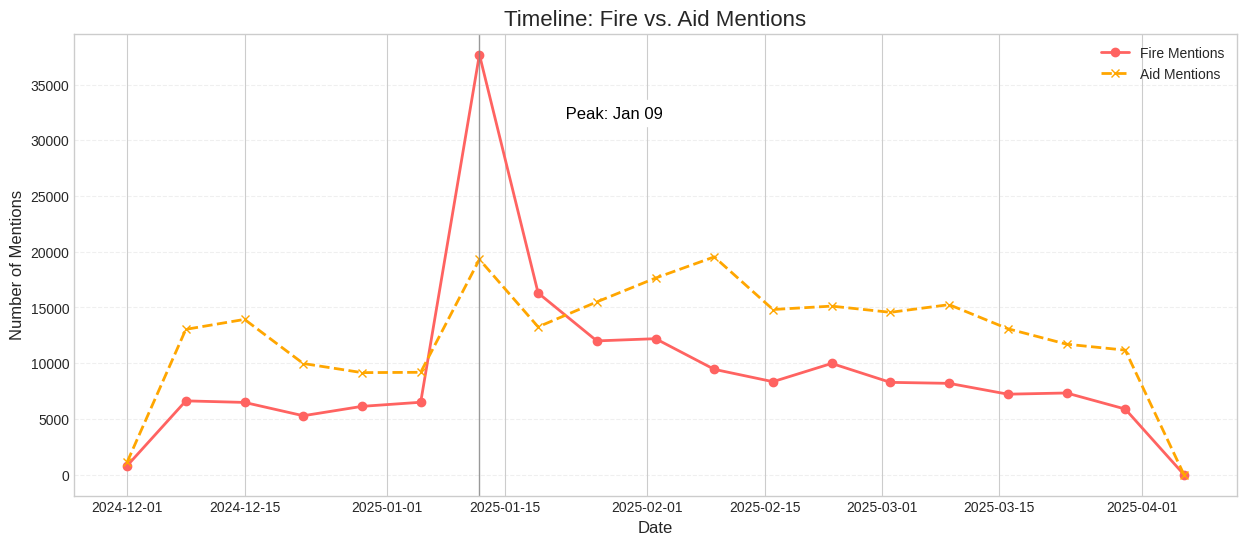

In [48]:
#data selection
weekly_data = df_plot.resample('W').agg(
    total_fire_mentions=('fire_mentioned', 'sum'),
    total_aid_mentions=('humanitarian_aid_mentioned', 'sum')
)

fig, ax = plt.subplots(figsize=(15, 6))


ax.set_title('Timeline: Fire vs. Aid Mentions', fontsize=16)
ax.set_xlabel('Date', fontsize=12, rotation=0)
ax.set_ylabel('Number of Mentions', fontsize=12) #common lable

#fires
ax.plot(
    weekly_data.index,
    weekly_data['total_fire_mentions'],
    color=MY_PALETTE['accent_coral'],
    label='Fire Mentions',
    marker='o',
    markersize=6,
    linestyle='-',
    linewidth=2
)

#humanitarian aid
ax.plot(
    weekly_data.index,
    weekly_data['total_aid_mentions'],
    color=MY_PALETTE['main_yellow'],
    label='Aid Mentions',
    marker='x',
    markersize=6,
    linestyle='--',
    linewidth=2
)

#peak date
peak_val = weekly_data['total_fire_mentions'].max()
peak_date = weekly_data['total_fire_mentions'].idxmax()
peak_date_str = peak_date.strftime('%Y-%m-%d')

#peak vertical line
ax.axvline(x=peak_date, color='grey', linestyle='-', linewidth=1, alpha=0.8)

x_start, x_end = ax.get_xlim()
x_mid = x_start + (x_end - x_start) / 2

ax.text(
    x=x_mid,
    y=32000,
    s=" Peak: Jan 09                   ",
    ha='center',
    fontsize=12,
    color='black',
    backgroundcolor='white')

ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(loc="upper right")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'), rotation=0)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

We observe that the peak of fire mentions and humanitarian aid mentions coincides, allowing us to conclude that during the most intense days of the fires, the discourse around aid was focused specifically on that event. However, it is noticeable that mentions of humanitarian aid remain relatively high during various periods both before and after the fires. Going forward, we aim to explore the framing of humanitarian aid discussions more closely.

### **4. Interesting findings:** correlations, spikes, or patterns worth explaining.

**4.1 What is the correlation of the combinations of comments topics though the timeperiod? (Category fire_mentioned +ai_related)**

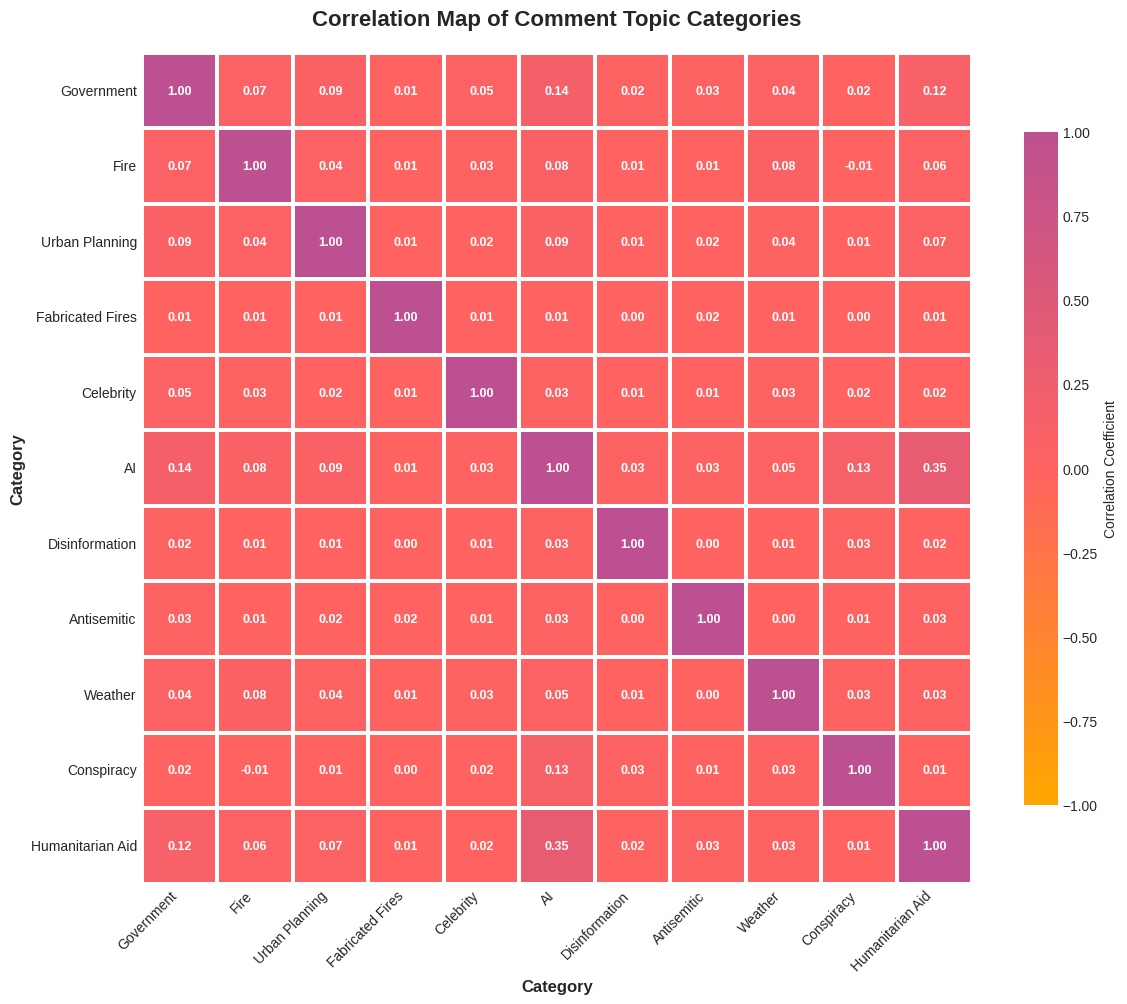

In [44]:
corr_matrix = df[categories].corr(method='pearson')

colors = ['#ffa600', '#ff6361', '#bc5090']
cmap = LinearSegmentedColormap.from_list('yellow_pink', colors, N=256)

pretty_labels = [
    'Government', 'Fire', 'Urban Planning',
    'Fabricated Fires', 'Celebrity', 'AI',
    'Disinformation', 'Antisemitic', 'Weather',
    'Conspiracy', 'Humanitarian Aid'
]

fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('white')

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    center=0,
    cmap=cmap,
    xticklabels=pretty_labels,
    yticklabels=pretty_labels,
    linewidths=1.5,
    linecolor='white',
    vmin=-1,
    vmax=1,
    cbar_kws={
        'label': 'Correlation Coefficient',
        'shrink': 0.8,
        'aspect': 20
    },
    square=True,
    annot_kws={'size': 9, 'weight': 'bold'}
)

plt.title('Correlation Map of Comment Topic Categories',
          fontsize=16,
          fontweight='bold',
          pad=20)
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Category', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


Our correlation analysis of comment topics reveals that the vast majority of topics are discussed independently on Reddit. Very few topic pairs (notably 'AI & Humanitarian Aid') show even moderate co-occurrence, and even these relationships are weak. This pattern demonstrates that most users tend to focus on single issues in their comments, with little evidence for highly multi-focused discussions during the period analyzed.

**4.2 The correlation between fire mentions and humanitarian aid mentions within the peak of the fires.**


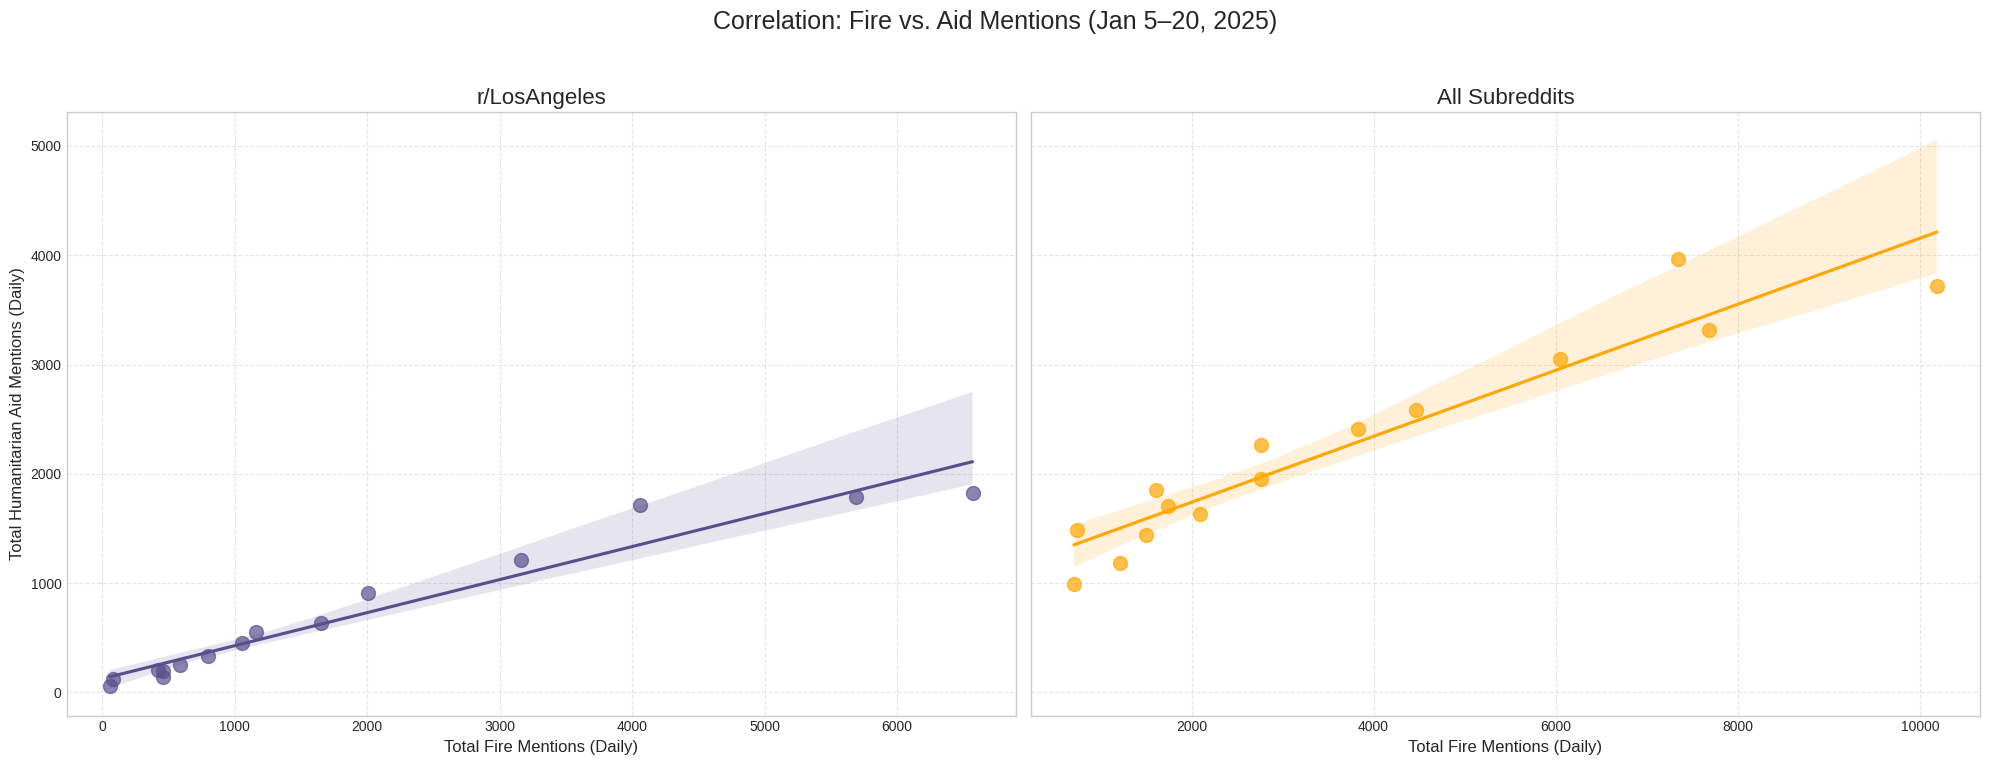

In [45]:
if not isinstance(df.index, pd.DatetimeIndex):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df_plot = df.set_index('datetime')
else:
    df_plot = df

# time selection
start_date = '2025-01-05'
end_date = '2025-01-20'
target_subreddit = 'LosAngeles'

# data selection
# activity count for r\LosAngeles
df_filtered_la = df_plot.loc[
    (df_plot.index >= start_date)
    & (df_plot.index <= end_date)
    & (df_plot['subreddit'] == target_subreddit)
]

daily_activity_la = (
    df_filtered_la
    .resample('D')
    .agg(
        total_fire_mentions=('fire_mentioned', 'sum'),
        total_aid_mentions=('humanitarian_aid_mentioned', 'sum')
    )
)
daily_activity_la.index.name = 'datetime'
daily_activity_la = daily_activity_la.reset_index(drop=True)

# activity count for all subreddits
df_filtered_all = df_plot.loc[
    (df_plot.index >= start_date)
    & (df_plot.index <= end_date)
]

daily_activity_all = (
    df_filtered_all
    .resample('D')
    .agg(
        total_fire_mentions=('fire_mentioned', 'sum'),
        total_aid_mentions=('humanitarian_aid_mentioned', 'sum')
    )
)
daily_activity_all.index.name = 'datetime'
daily_activity_all = daily_activity_all.reset_index(drop=True)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), sharey=True)
fig.suptitle('Correlation: Fire vs. Aid Mentions (Jan 5–20, 2025)', fontsize=18)

sns.regplot(
    data=daily_activity_la,
    x='total_fire_mentions',
    y='total_aid_mentions',
    color=MY_PALETTE['mid_purple'],
    scatter_kws={'s': 100, 'alpha': 0.7},
    ax=ax1
)


ax1.set_title(f'r/{target_subreddit}', fontsize=16)
ax1.set_xlabel('Total Fire Mentions (Daily)', fontsize=12)
ax1.set_ylabel('Total Humanitarian Aid Mentions (Daily)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)


sns.regplot(
    data=daily_activity_all,
    x='total_fire_mentions',
    y='total_aid_mentions',
    color=MY_PALETTE['main_yellow'],
    scatter_kws={'s': 100, 'alpha': 0.7},
    ax=ax2
)


ax2.set_title('All Subreddits', fontsize=16)
ax2.set_xlabel('Total Fire Mentions (Daily)', fontsize=12)
ax2.set_ylabel('')
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The chart shows amount of fire mentions and humanitarian aid mentions on the same day during January 5-12. One dot - on day.

The charts confirm the hypothesis that during the peak of the fires, discussions of humanitarian aid were concentrated around that specific event. We observe a strong correlation between fire mentions and aid mentions, indicating a shared narrative. Notably, the correlation is even higher within the local subreddit compared to the overall dataset, which supports the assumption of localized discourse — suggesting that the response to the crisis was more focused within local online communities.

**4.3Will fire-related topics make up the absolute majority in the analysis of n-gram words of comments from the humanitarian aid category?**

In [51]:
# import libraries for TF-DF analysis

import plotly.express as px
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


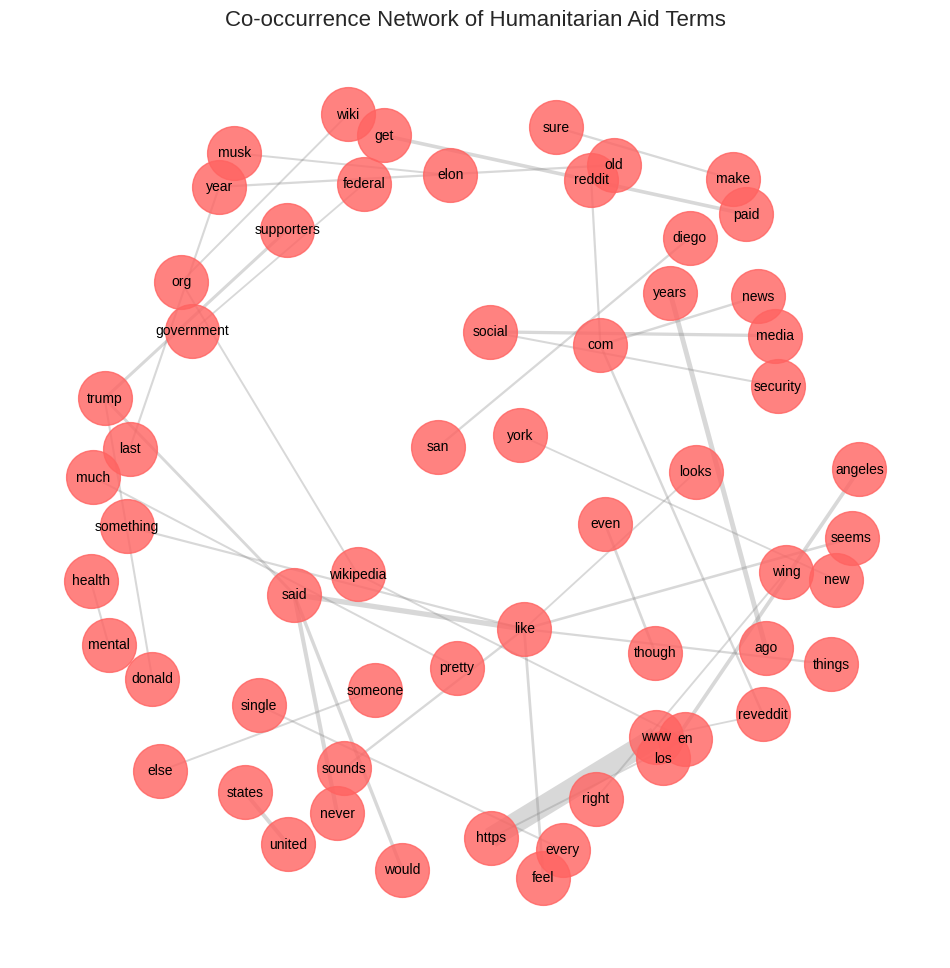

In [52]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

# stop words to avoid obvious and non representive bigrams
stop_words.extend(['aid', 'help', 'helping', 'support', 'emergency', 'people', 'need'])

# data selection by topic
aid_texts = df[df['humanitarian_aid_mentioned'] == True]['body'].copy()

vec_graph = CountVectorizer(ngram_range=(2, 2), max_features=40, stop_words=stop_words)
bigrams_graph = vec_graph.fit_transform(aid_texts.astype(str))
bigram_df = pd.DataFrame(bigrams_graph.toarray(), columns=vec_graph.get_feature_names_out()).sum().reset_index()
bigram_df.columns = ['bigram', 'count']
bigram_df = bigram_df[bigram_df['count'] > 0]

bigram_df[['word1', 'word2']] = bigram_df['bigram'].str.split(' ', expand=True)

# draph visualization - most widespread bigram has stronger edge
G = nx.from_pandas_edgelist(
    bigram_df,
    source='word1',
    target='word2',
    edge_attr='count'
)

plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G, k=0.6, iterations=30, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=MY_PALETTE['accent_coral'], alpha=0.8)

edge_widths = [d['count'] * 0.001 for u, v, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.3, edge_color='grey')

nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Co-occurrence Network of Humanitarian Aid Terms', fontsize=16)
plt.axis('off')
plt.show()

We analyzed the 40 most popular bigrams in comments from the humanitarian aid category. The results showed that while expected bigrams like "los angeles" and "san diego" were present, the majority of them relate to mentions of politics, logistics, government, and mental health in general. This indicates that the high popularity of the humanitarian aid category is not caused solely by the fires.
However, a correlation does exist during the peak days of the fire, which is illustrated by the graphs above.


**4.4 Topic modeling of humanitarian discourse**

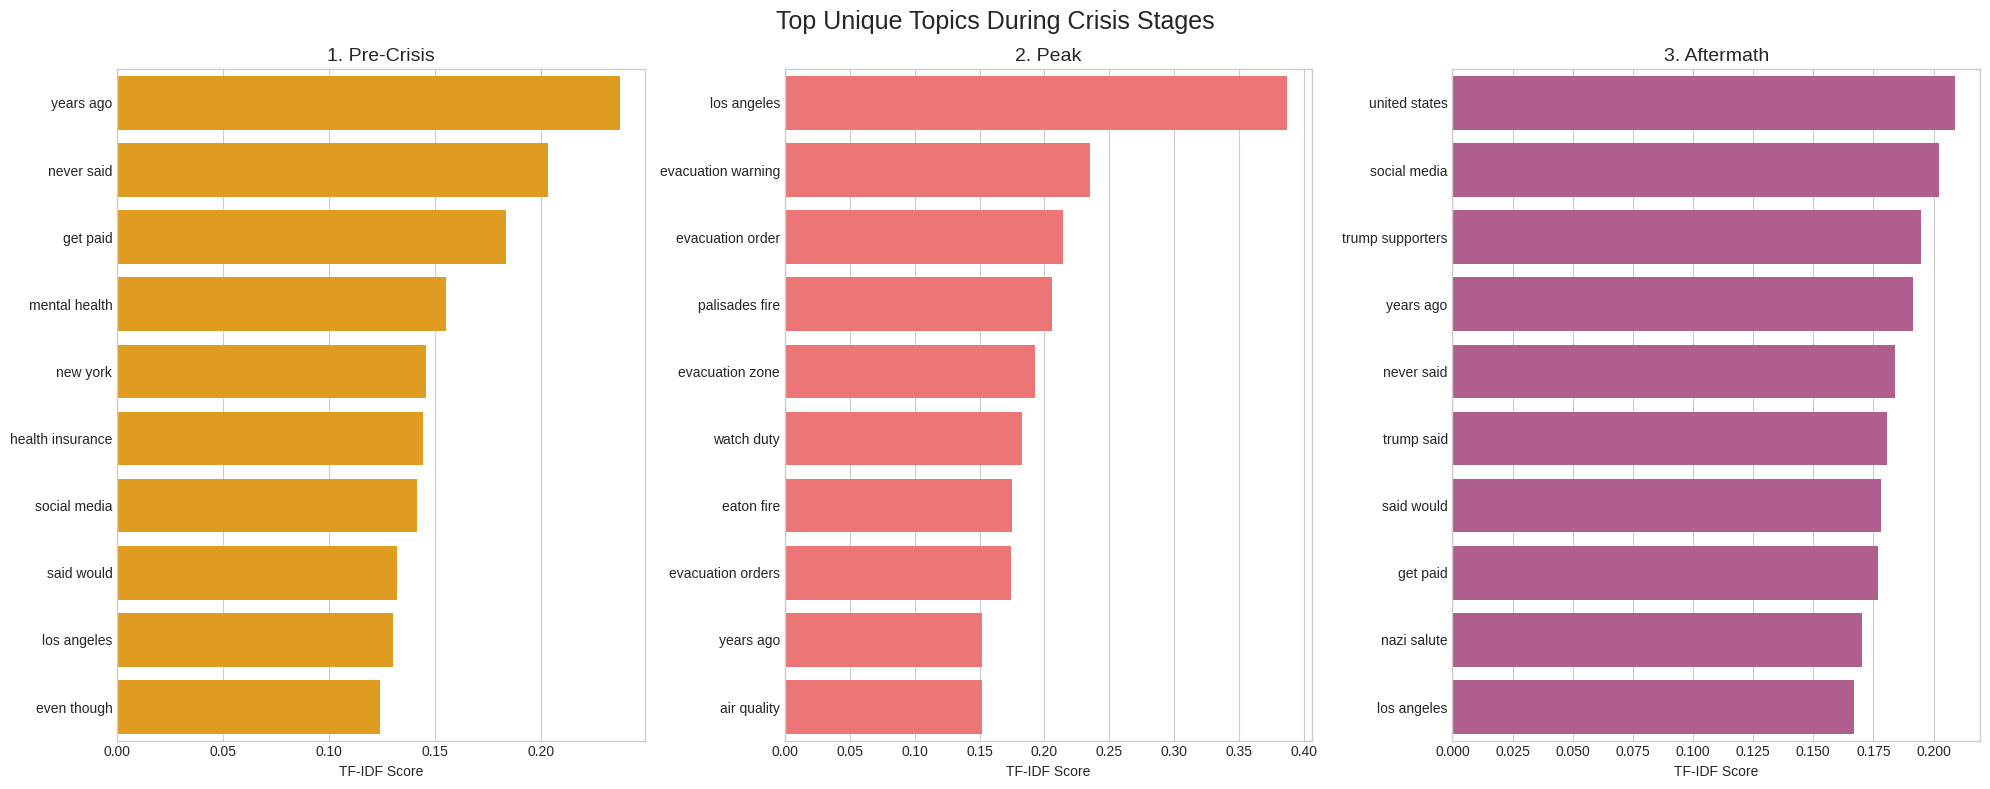

In [60]:

#filter data
aid_df = df[df['humanitarian_aid_mentioned'] == True].copy()

# time selection
def assign_period(date):
    if date < pd.Timestamp('2025-01-07'):
        return '1. Pre-Crisis'
    elif pd.Timestamp('2025-01-07') <= date <= pd.Timestamp('2025-01-15'):
        return '2. Peak'
    elif pd.Timestamp('2025-01-16') <= date <= pd.Timestamp('2025-01-31'):
        return '3. Aftermath'
    else:
        return '4. Other'

aid_df['period'] = aid_df.index.map(assign_period)
aid_df = aid_df[aid_df['period'] != '4. Other']

# group all comments of the time period
period_docs = aid_df.groupby('period')['body'].apply(lambda x: ' '.join(x.astype(str)))


# tfidf for the one period
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words=stop_words, max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(period_docs)
feature_names = tfidf_vectorizer.get_feature_names_out()


# top bigrams for each period
periods = period_docs.index
fig, axes = plt.subplots(1, len(periods), figsize=(20, 8), sharex=False)


for i, period in enumerate(periods):
    row = tfidf_matrix.getrow(i).toarray()[0]
    top_indices = row.argsort()[-10:][::-1] # top 10 tfidf index

    top_features = [feature_names[j] for j in top_indices]
    top_scores = [row[j] for j in top_indices]

    sns.barplot(x=top_scores, y=top_features, ax=axes[i], color=list(MY_PALETTE.values())[i])
    axes[i].set_title(f"{period}", fontsize=14)
    axes[i].set_xlabel("TF-IDF Score")

plt.suptitle("Top Unique Topics During Crisis Stages", fontsize=18)
plt.tight_layout()
plt.show()

We analyzed the 40 most popular bigrams in comments from the humanitarian aid category. The results showed that while expected bigrams like "los angeles" and "san diego" were present, the majority of them relate to mentions of politics, logistics, government, and mental health in general. This indicates that the high popularity of the humanitarian aid category is not caused solely by the fires.
However, a correlation does exist during the peak days of the fire, which is illustrated by the graphs above.
